# MedMNIST predictions distribution analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

# ChestMNIST

Multi-label classification

In [2]:
labels_dict = [ "atelectasis", "cardiomegaly", "effusion", "infiltration",
    "mass", "nodule", "pneumonia", "pneumothorax", "consolidation",
    "edema", "emphysema", "fibrosis", "pleural", "hernia" ]

In [3]:
ch_datafile = "./../data/chestmnist.npz"
ch_data = np.load(ch_datafile)

ch_tr_labels = ch_data['train_labels']
ch_va_labels = ch_data['val_labels']
ch_te_labels = ch_data['test_labels']

In [4]:
train_pred_file = "./../pretrained/predictions/chestmnist/chestmnist_train_[AUC]0.836_[ACC]0.950@resnet18_28_2.csv"
train_pred_scores = np.loadtxt(train_pred_file, delimiter=',')[:, 1:]
train_pred_labels = (train_pred_scores > 0.50).astype(int)

val_pred_file = "./../pretrained/predictions/chestmnist/chestmnist_val_[AUC]0.768_[ACC]0.948@resnet18_28_2.csv"
val_pred_scores = np.loadtxt(val_pred_file, delimiter=',')[:, 1:]
val_pred_labels = (val_pred_scores > 0.50).astype(int)

test_pred_file = "./../pretrained/predictions/chestmnist/chestmnist_test_[AUC]0.770_[ACC]0.946@resnet18_28_2.csv"
test_pred_scores = np.loadtxt(test_pred_file, delimiter=',')[:, 1:]
test_pred_labels = (test_pred_scores > 0.50).astype(int)

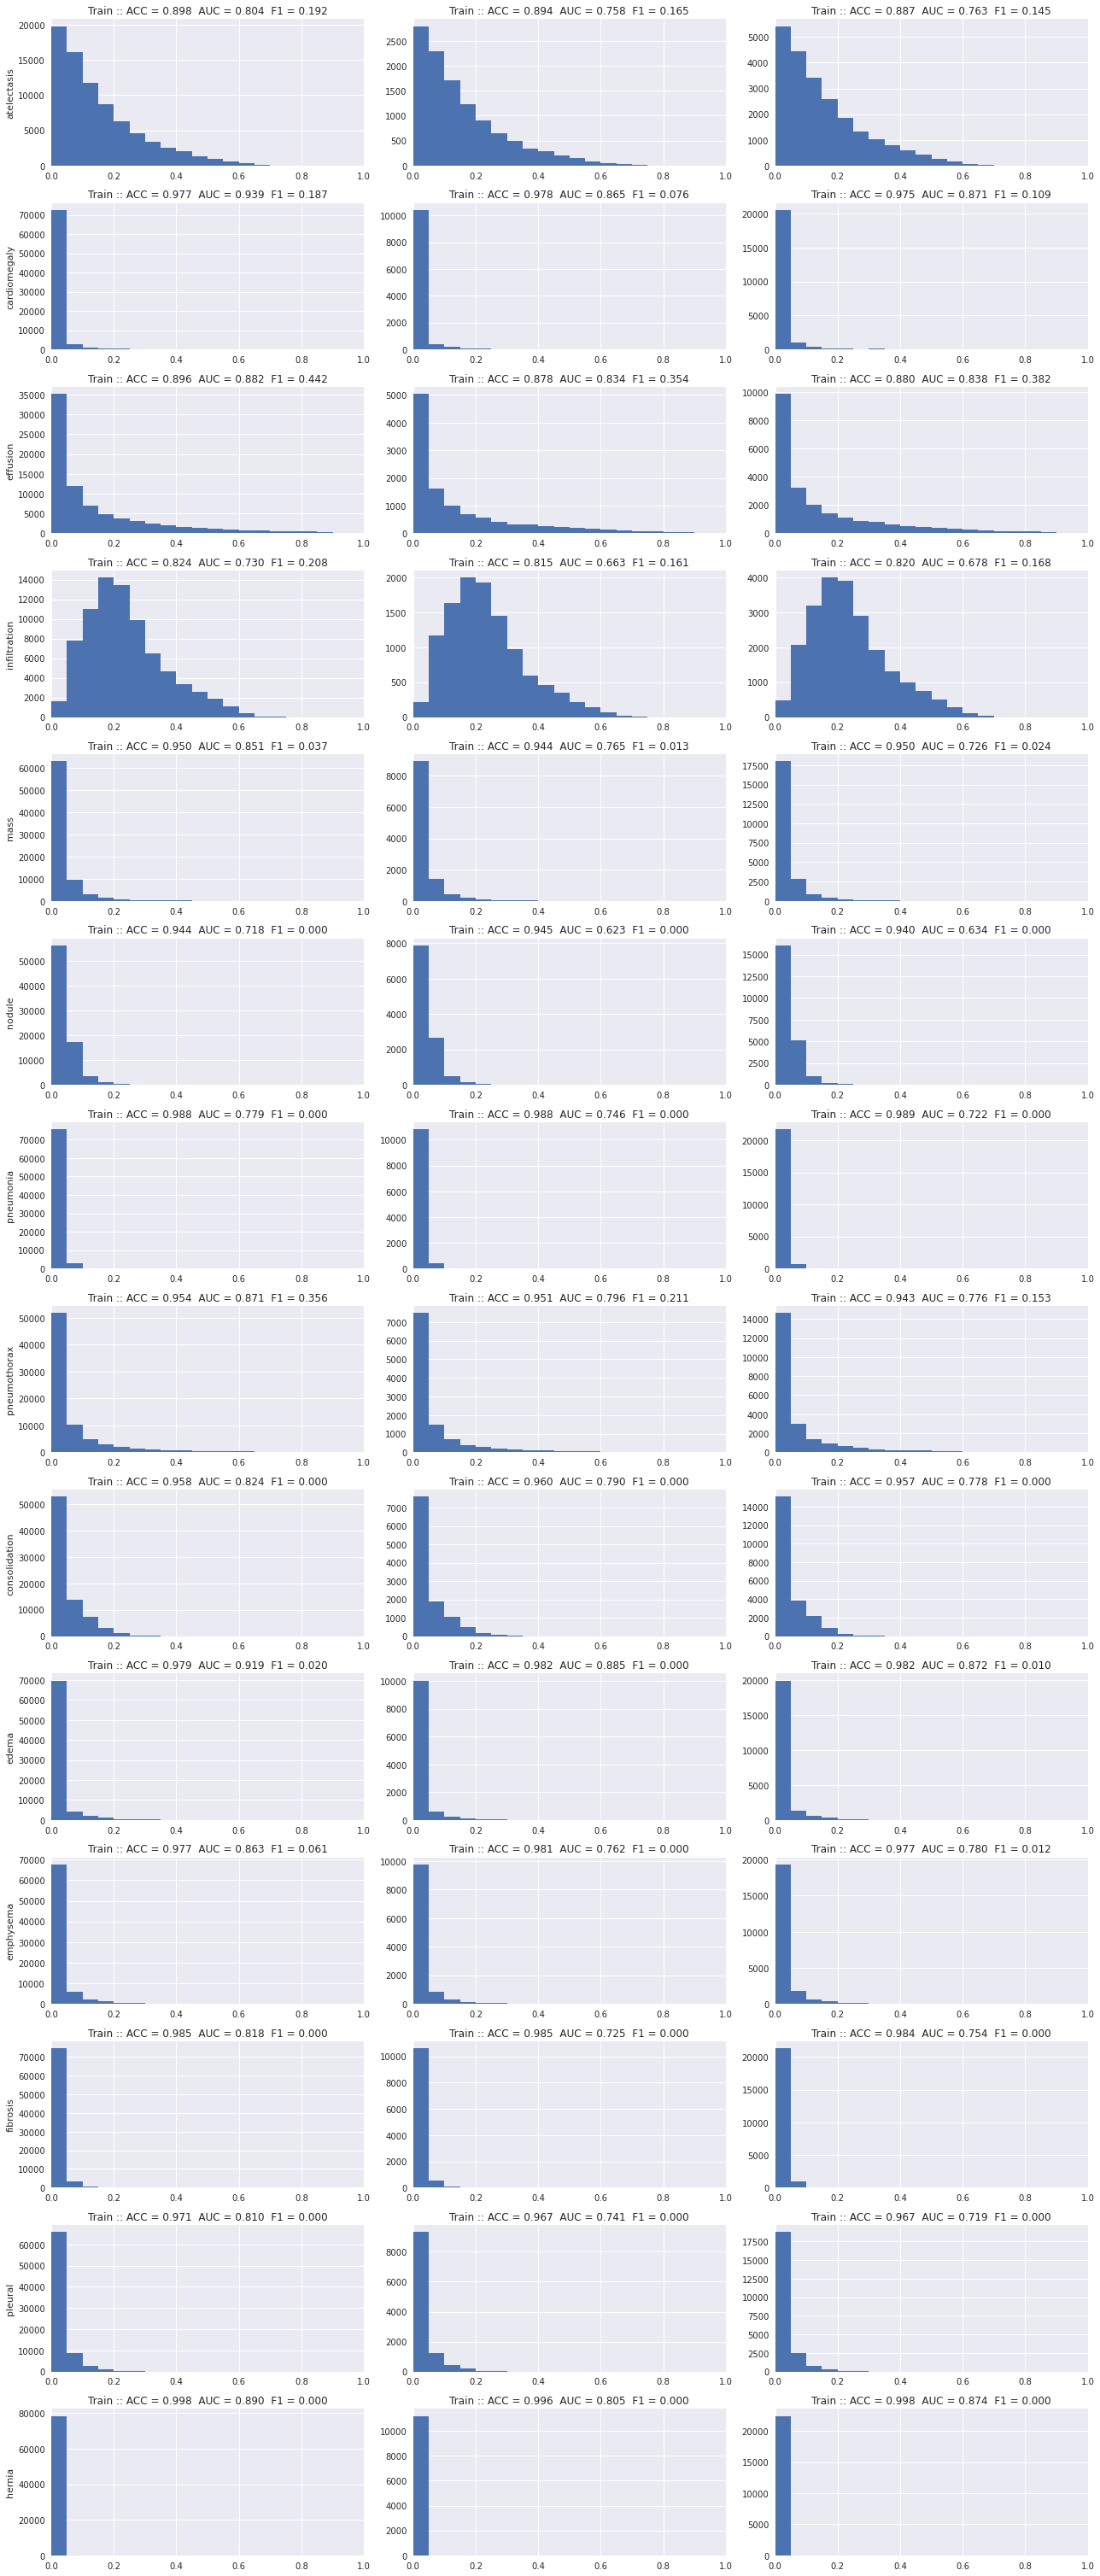

In [5]:
K = train_pred_scores.shape[1]

fig, ax = plt.subplots(K, 3, figsize=(3*6, K*3))

for i in range(K):
    
    # trainset
    _ax = ax[i, 0]
    # Get labels
    yscore = train_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    # compute metrics
    ypred = yscore > 0.50
    ytrue = ch_tr_labels[:, i]
    acc = accuracy_score(ytrue, ypred)
    auc = roc_auc_score(ytrue, yscore)
    f1 = f1_score(ytrue, ypred)
    _ax.set_title("Train :: ACC = {:.3f}  AUC = {:.3f}  F1 = {:.3f}".format(acc, auc, f1))
    _ax.set_xlim(0, 1)
    _ax.set_ylabel(labels_dict[i])
    
    
    # val set
    _ax = ax[i, 1]
    # Get labels
    yscore = val_pred_scores[:, i]
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    # compute metrics
    ypred = yscore > 0.50
    ytrue = ch_va_labels[:, i]
    acc = accuracy_score(ytrue, ypred)
    auc = roc_auc_score(ytrue, yscore)
    f1 = f1_score(ytrue, ypred)
    _ax.set_title("Train :: ACC = {:.3f}  AUC = {:.3f}  F1 = {:.3f}".format(acc, auc, f1))
    _ax.set_xlim(0, 1)
    
    
    # test set
    _ax = ax[i, 2]
    # Get labels
    yscore = test_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    # compute metrics
    ypred = yscore > 0.50
    ytrue = ch_te_labels[:, i]
    acc = accuracy_score(ytrue, ypred)
    auc = roc_auc_score(ytrue, yscore)
    f1 = f1_score(ytrue, ypred)
    _ax.set_title("Train :: ACC = {:.3f}  AUC = {:.3f}  F1 = {:.3f}".format(acc, auc, f1))
    _ax.set_xlim(0, 1)
    
plt.tight_layout()

## BloodMNIST

In [6]:
labels_dict = [ "basophil", "eosinophil", "erythroblast",
    "immature granulocytes", "lymphocyte", "monocyte",
    "neutrophil", "platelet" ]

In [7]:
bl_datafile = "./../data/bloodmnist.npz"
bl_data = np.load(bl_datafile)

bl_tr_labels = bl_data['train_labels']
bl_va_labels = bl_data['val_labels']
bl_te_labels = bl_data['test_labels']

In [8]:
train_pred_file = "./../pretrained/predictions/bloodmnist/bloodmnist_train_[AUC]1.000_[ACC]1.000@resnet18_28_1.csv"
train_pred_scores = np.loadtxt(train_pred_file, delimiter=',')[:, 1:]
train_pred_labels = np.argmax(train_pred_scores, axis=1)

val_pred_file = "./../pretrained/predictions/bloodmnist/bloodmnist_val_[AUC]0.998_[ACC]0.966@resnet18_28_1.csv"
val_pred_scores = np.loadtxt(val_pred_file, delimiter=',')[:, 1:]
val_pred_labels = np.argmax(val_pred_scores, axis=1)

test_pred_file = "./../pretrained/predictions/bloodmnist/bloodmnist_test_[AUC]0.997_[ACC]0.958@resnet18_28_1.csv"
test_pred_scores = np.loadtxt(test_pred_file, delimiter=',')[:, 1:]
test_pred_labels = np.argmax(test_pred_scores, axis=1)

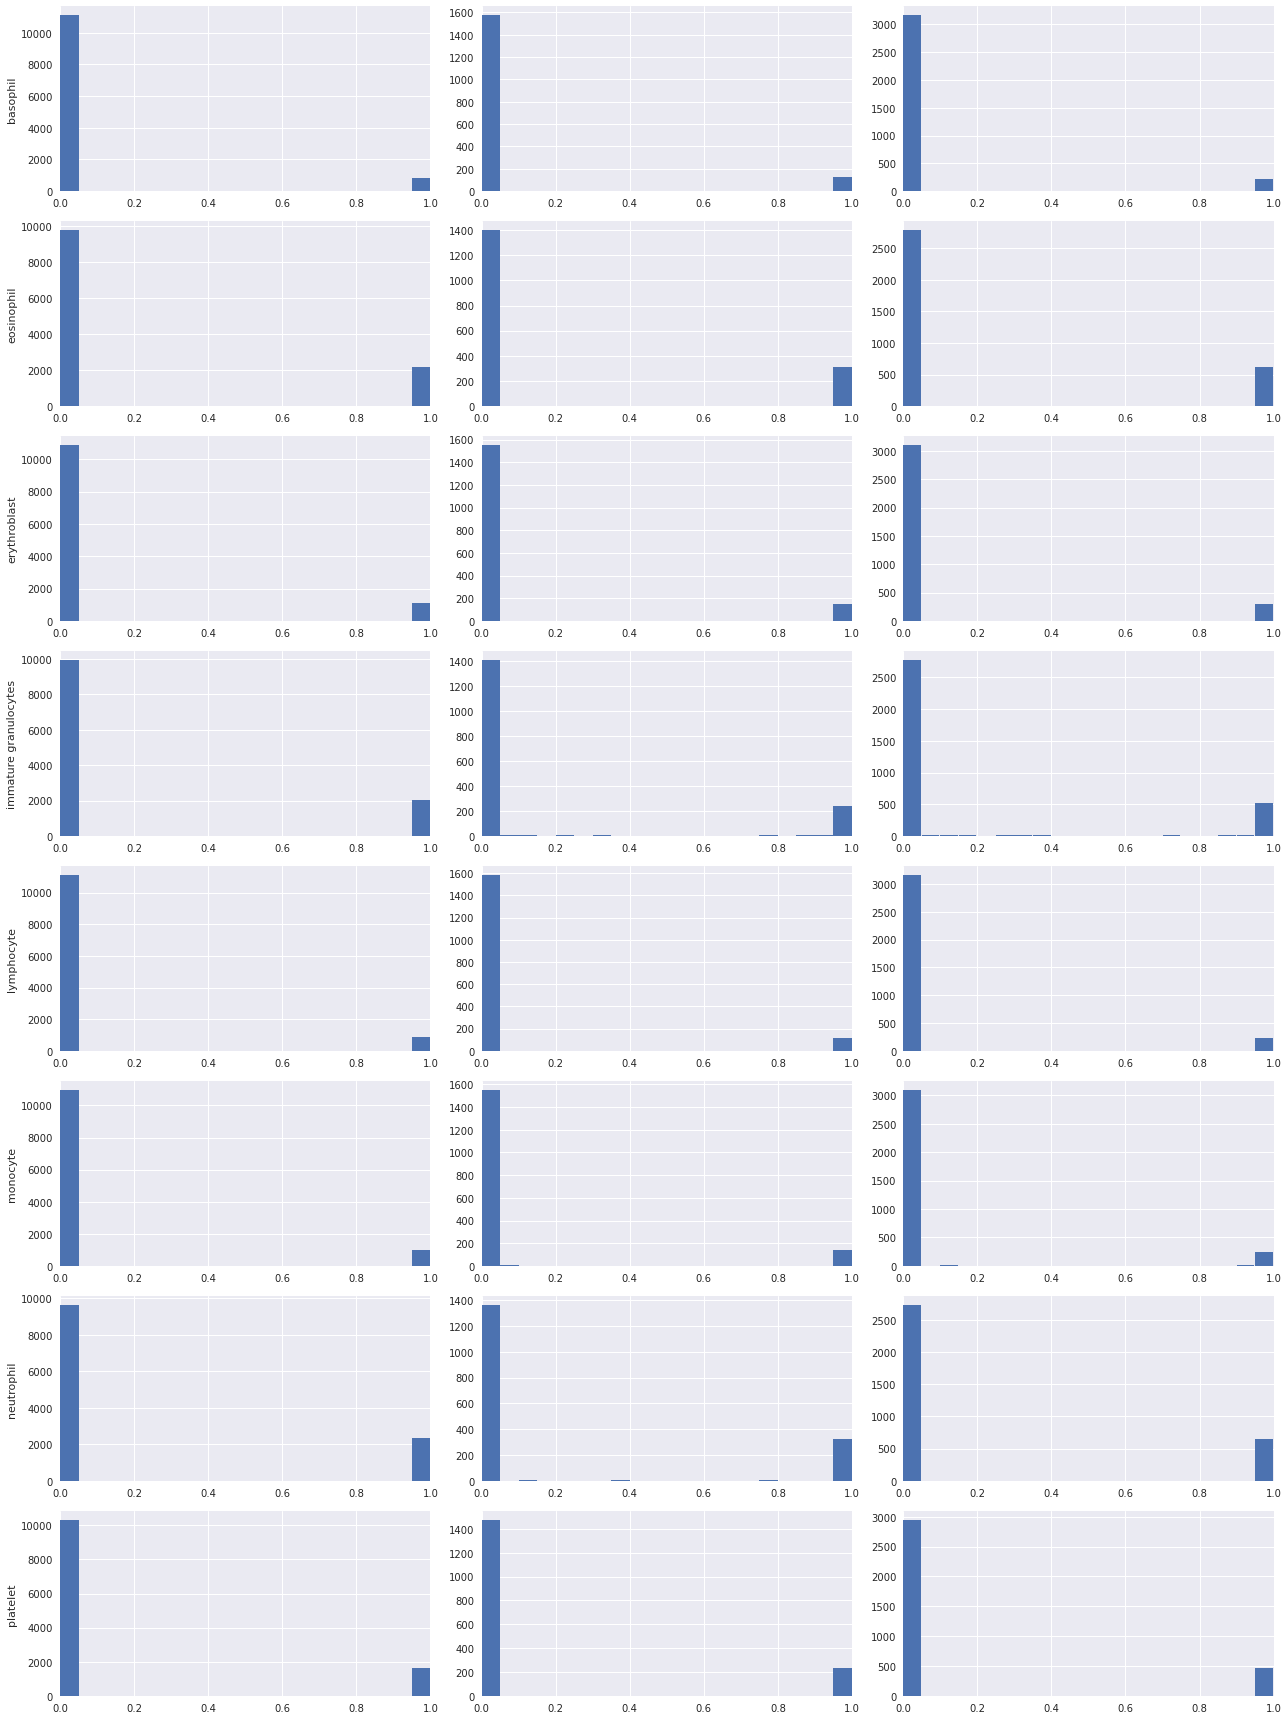

In [9]:
K = train_pred_scores.shape[1]

fig, ax = plt.subplots(K, 3, figsize=(3*6, K*3))

for i in range(K):
    
    # trainset
    _ax = ax[i, 0]
    # Get labels
    yscore = train_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    _ax.set_ylabel(labels_dict[i])
    
    
    # val set
    _ax = ax[i, 1]
    # Get labels
    yscore = val_pred_scores[:, i]
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    
    
    # test set
    _ax = ax[i, 2]
    # Get labels
    yscore = test_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/(20+1))
    _ax.set_xlim(0, 1)
    
plt.tight_layout()

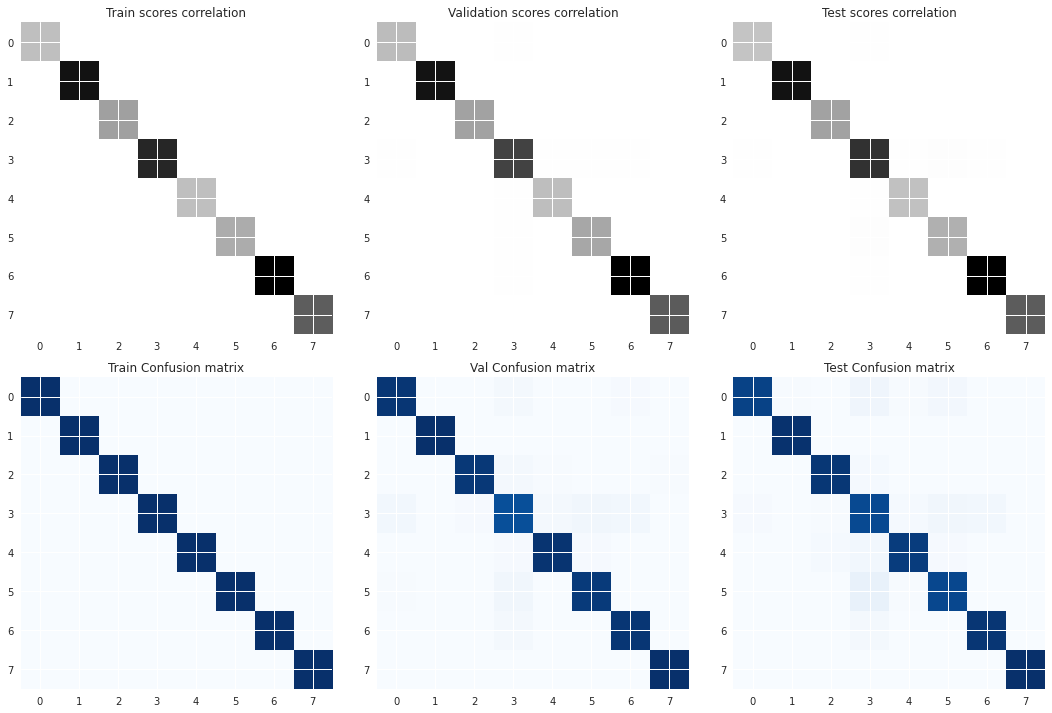

In [10]:
fig, ax = plt.subplots(2, 3, figsize=(5*3, 5*2))

m1 = np.matmul(train_pred_scores.T, train_pred_scores)
ax[0, 0].imshow(m1)
ax[0, 0].set_title("Train scores correlation")
cm1 = confusion_matrix(bl_tr_labels, train_pred_labels, normalize='true')
ax[1, 0].imshow(cm1, cmap='Blues')
ax[1, 0].set_title("Train Confusion matrix")

m2 = np.matmul(val_pred_scores.T, val_pred_scores)
ax[0, 1].imshow(m2)
ax[0, 1].set_title("Validation scores correlation")
cm2 = confusion_matrix(bl_va_labels, val_pred_labels, normalize='true')
ax[1, 1].imshow(cm2, cmap='Blues')
ax[1, 1].set_title("Val Confusion matrix")

m3 = np.matmul(test_pred_scores.T, test_pred_scores)
ax[0, 2].imshow(m3)
ax[0, 2].set_title("Test scores correlation")
cm3 = confusion_matrix(bl_te_labels, test_pred_labels, normalize='true')
ax[1, 2].imshow(cm3, cmap='Blues')
ax[1, 2].set_title("Test Confusion matrix")

plt.tight_layout()

## PathMNIST

In [11]:
labels_dict = [ "adipose", "background", "debris", "lymphocytes",
    "mucus", "smooth muscle", "normal colon mucosa", "cancer-associated stroma",
    "colorectal adenocarcinoma epithelium"
]

In [12]:
pa_datafile = "./../data/pathmnist.npz"
pa_data = np.load(pa_datafile)

pa_tr_labels = pa_data['train_labels']
pa_va_labels = pa_data['val_labels']
pa_te_labels = pa_data['test_labels']

In [13]:
train_pred_file = "./../pretrained/predictions/pathmnist/pathmnist_train_[AUC]1.000_[ACC]1.000@resnet18_28_1.csv"
train_pred_scores = np.loadtxt(train_pred_file, delimiter=',')[:, 1:]
train_pred_labels = np.argmax(train_pred_scores, axis=1)

val_pred_file = "./../pretrained/predictions/pathmnist/pathmnist_val_[AUC]1.000_[ACC]0.989@resnet18_28_1.csv"
val_pred_scores = np.loadtxt(val_pred_file, delimiter=',')[:, 1:]
val_pred_labels = np.argmax(val_pred_scores, axis=1)

test_pred_file = "./../pretrained/predictions/pathmnist/pathmnist_test_[AUC]0.980_[ACC]0.913@resnet18_28_1.csv"
test_pred_scores = np.loadtxt(test_pred_file, delimiter=',')[:, 1:]
test_pred_labels = np.argmax(test_pred_scores, axis=1)

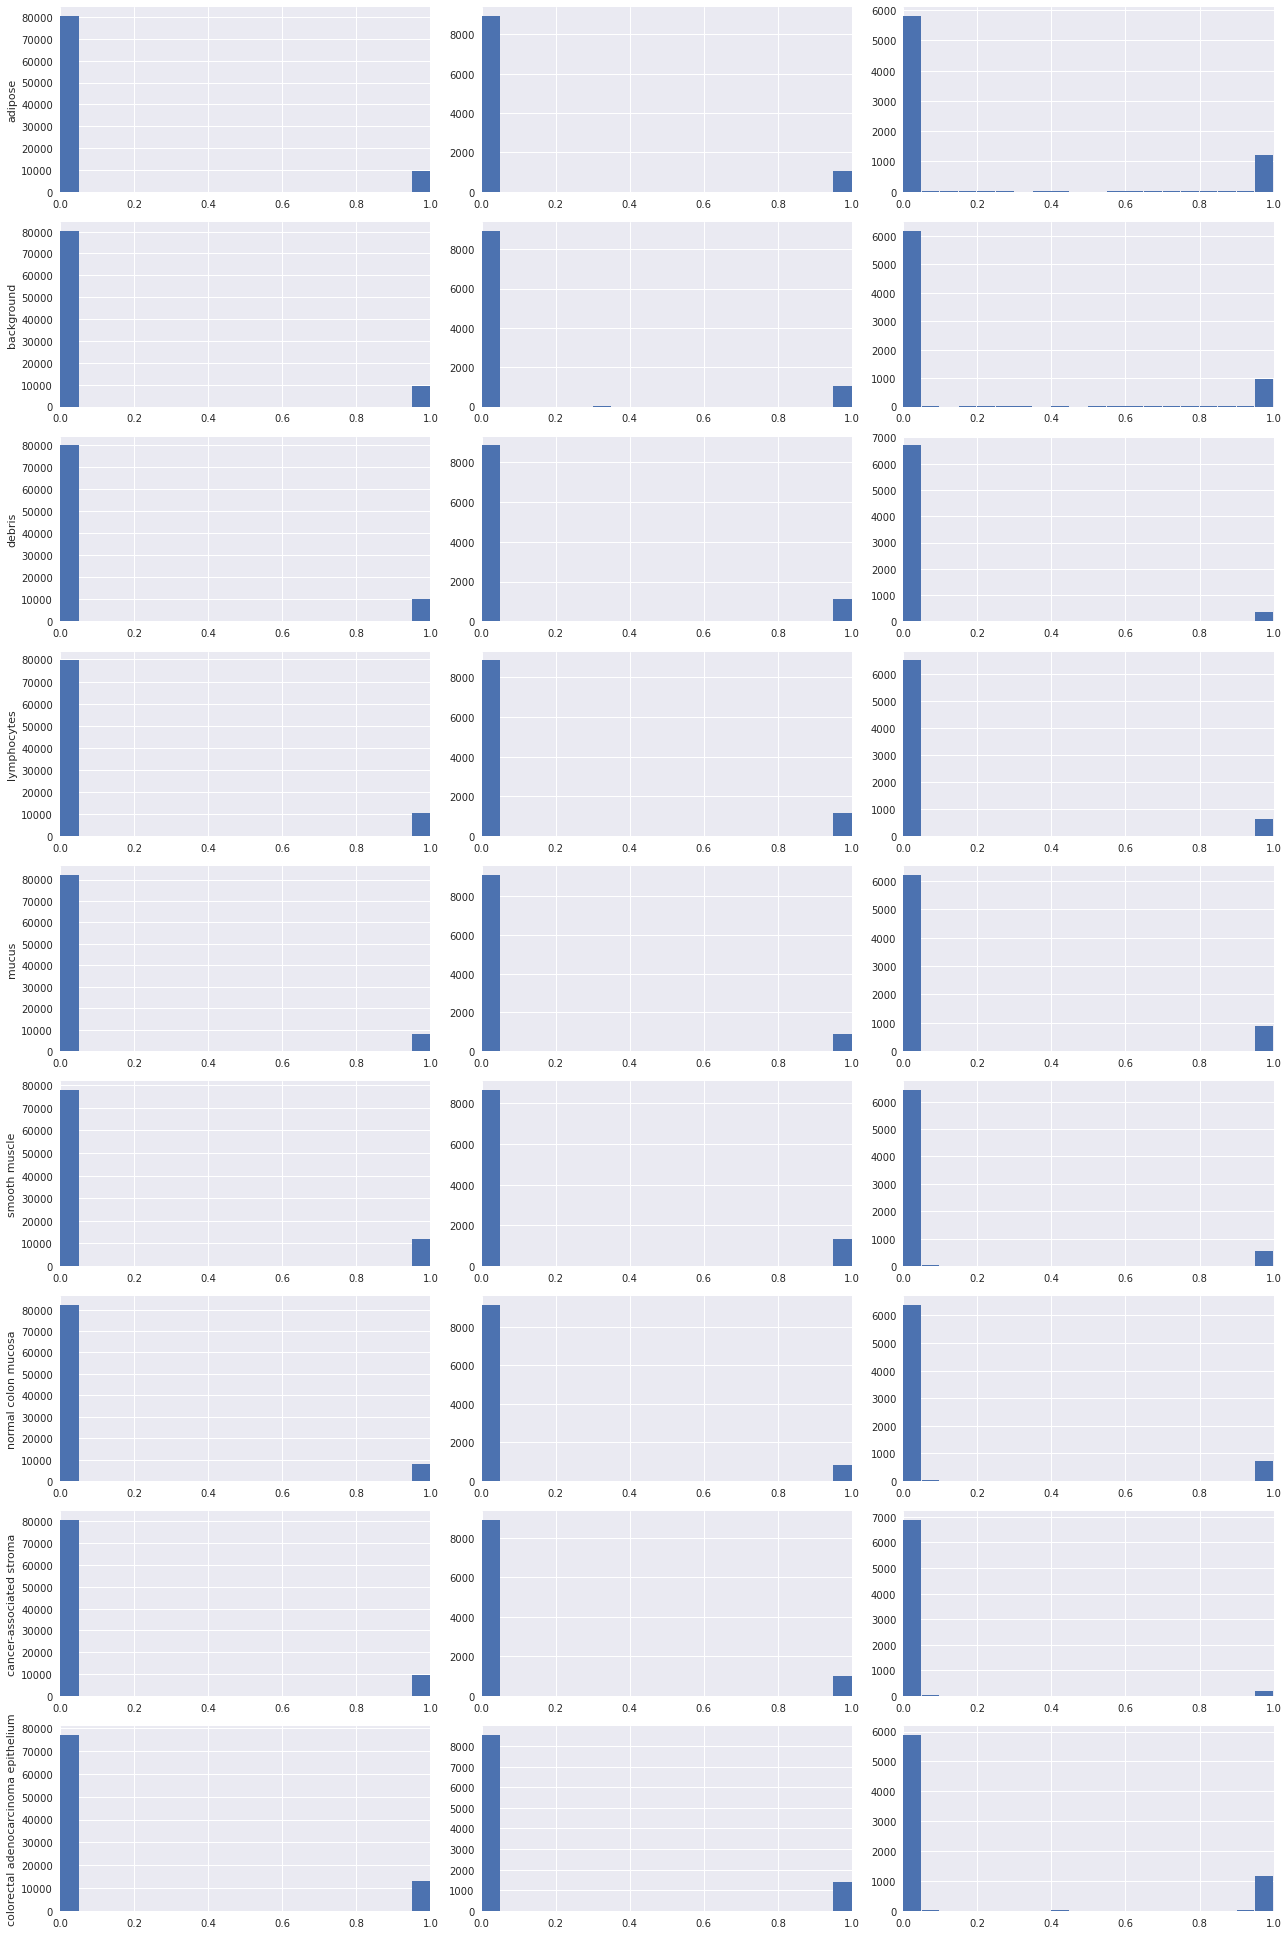

In [14]:
K = train_pred_scores.shape[1]

fig, ax = plt.subplots(K, 3, figsize=(3*6, K*3))

for i in range(K):
    
    # trainset
    _ax = ax[i, 0]
    # Get labels
    yscore = train_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    _ax.set_ylabel(labels_dict[i])
    
    
    # val set
    _ax = ax[i, 1]
    # Get labels
    yscore = val_pred_scores[:, i]
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    
    
    # test set
    _ax = ax[i, 2]
    # Get labels
    yscore = test_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/(20+1))
    _ax.set_xlim(0, 1)
    
plt.tight_layout()

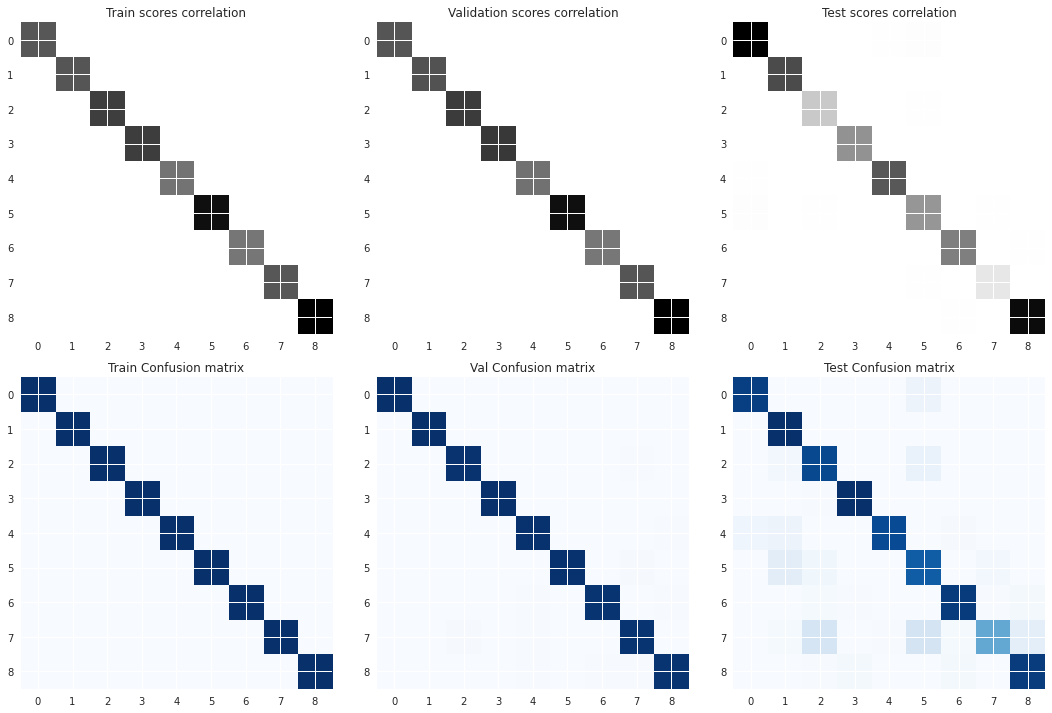

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(5*3, 5*2))

m1 = np.matmul(train_pred_scores.T, train_pred_scores)
ax[0, 0].imshow(m1)
ax[0, 0].set_title("Train scores correlation")
cm1 = confusion_matrix(pa_tr_labels, train_pred_labels, normalize='true')
ax[1, 0].imshow(cm1, cmap='Blues')
ax[1, 0].set_title("Train Confusion matrix")

m2 = np.matmul(val_pred_scores.T, val_pred_scores)
ax[0, 1].imshow(m2)
ax[0, 1].set_title("Validation scores correlation")
cm2 = confusion_matrix(pa_va_labels, val_pred_labels, normalize='true')
ax[1, 1].imshow(cm2, cmap='Blues')
ax[1, 1].set_title("Val Confusion matrix")

m3 = np.matmul(test_pred_scores.T, test_pred_scores)
ax[0, 2].imshow(m3)
ax[0, 2].set_title("Test scores correlation")
cm3 = confusion_matrix(pa_te_labels, test_pred_labels, normalize='true')
ax[1, 2].imshow(cm3, cmap='Blues')
ax[1, 2].set_title("Test Confusion matrix")

plt.tight_layout()

## TissueMNIST

In [16]:
labels_dict = [  "Collecting Duct, Connecting Tubule", 
    "Distal Convoluted Tubule", "Glomerular endothelial cells",
    "Interstitial endothelial cells", "Leukocytes", "Podocytes", 
    "Proximal Tubule Segments", "Thick Ascending Limb"]

In [17]:
ti_datafile = "./../data/tissuemnist.npz"
ti_data = np.load(ti_datafile)

ti_tr_labels = ti_data['train_labels']
ti_va_labels = ti_data['val_labels']
ti_te_labels = ti_data['test_labels']

In [18]:
train_pred_file = "./../pretrained/predictions/tissuemnist/tissuemnist_train_[AUC]0.964_[ACC]0.771@resnet18_28_2.csv"
train_pred_scores = np.loadtxt(train_pred_file, delimiter=',')[:, 1:]
train_pred_labels = np.argmax(train_pred_scores, axis=1)

val_pred_file = "./../pretrained/predictions/tissuemnist/tissuemnist_val_[AUC]0.930_[ACC]0.688@resnet18_28_2.csv"
val_pred_scores = np.loadtxt(val_pred_file, delimiter=',')[:, 1:]
val_pred_labels = np.argmax(val_pred_scores, axis=1)

test_pred_file = "./../pretrained/predictions/tissuemnist/tissuemnist_test_[AUC]0.931_[ACC]0.683@resnet18_28_2.csv"
test_pred_scores = np.loadtxt(test_pred_file, delimiter=',')[:, 1:]
test_pred_labels = np.argmax(test_pred_scores, axis=1)

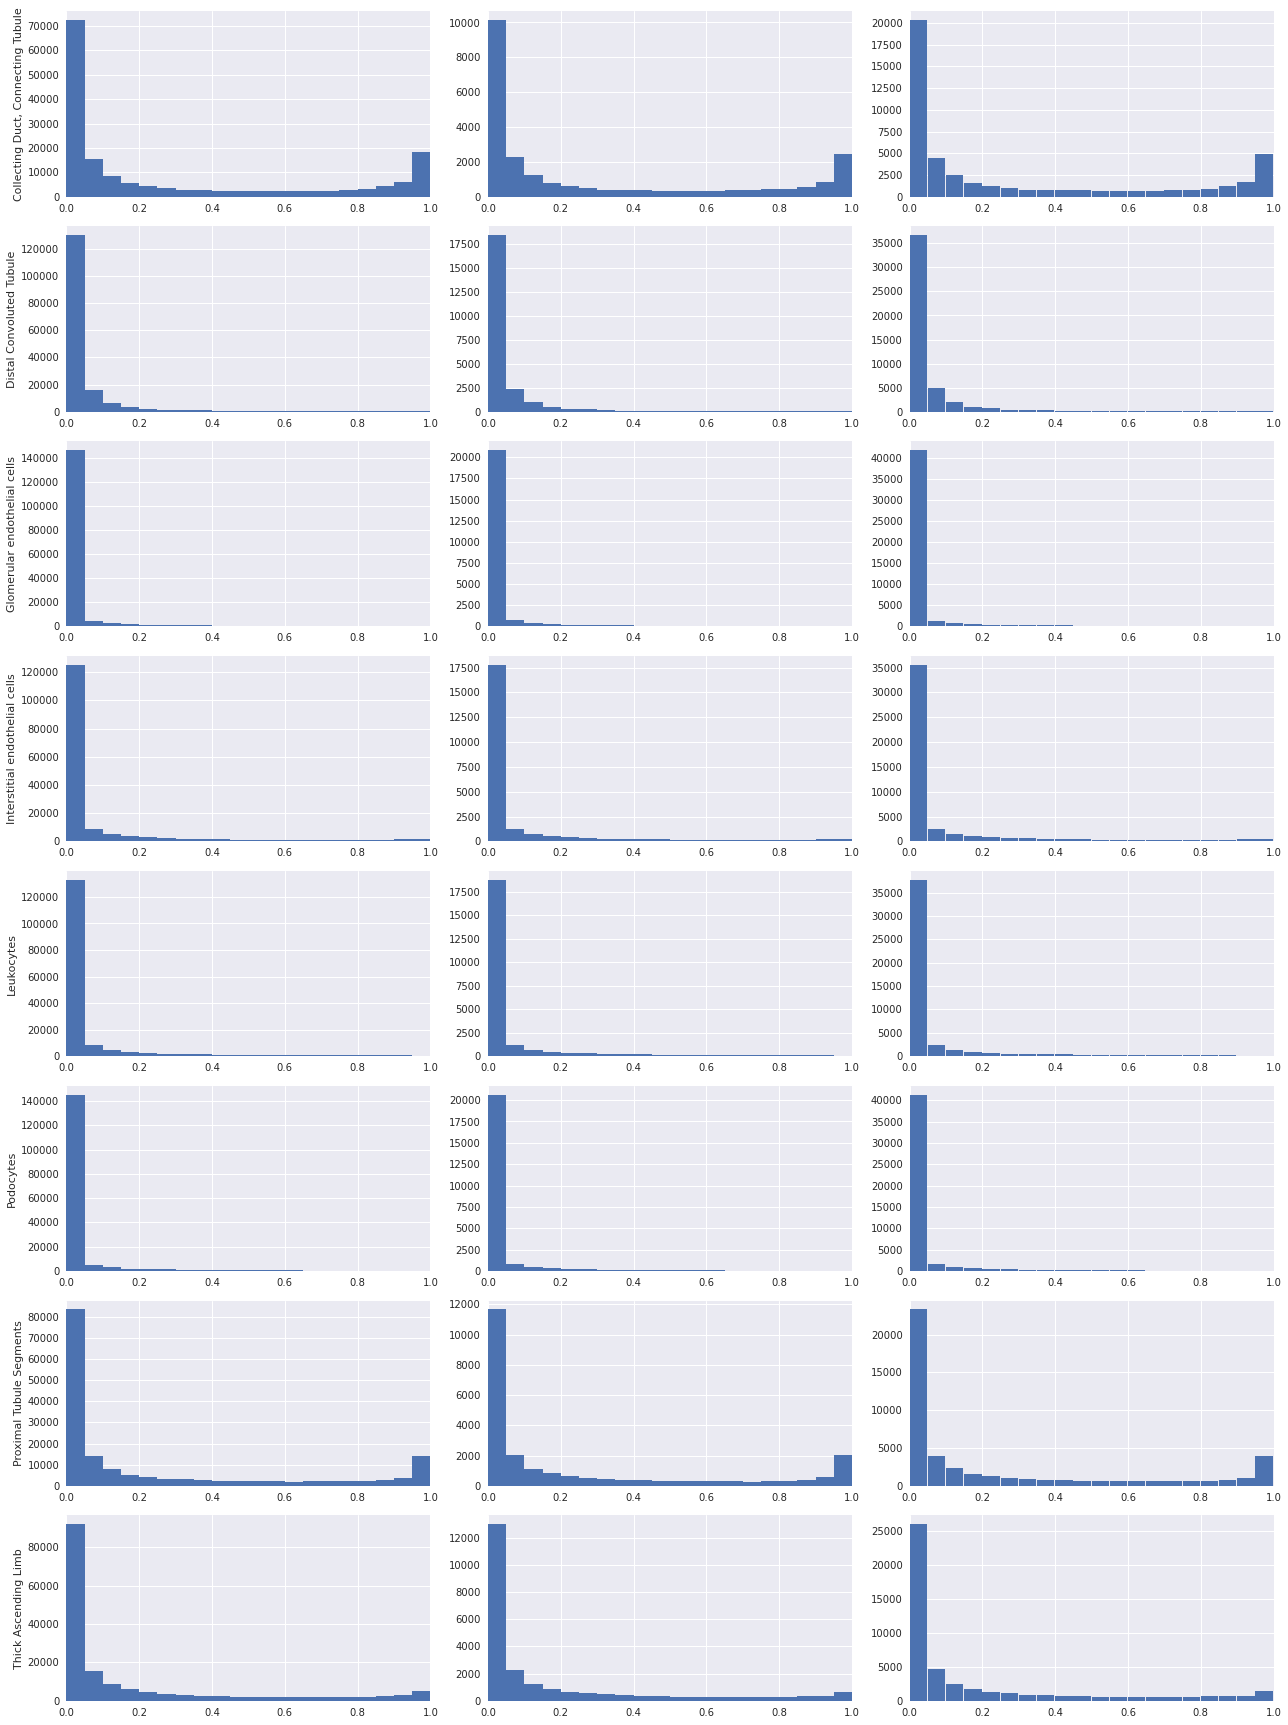

In [19]:
K = train_pred_scores.shape[1]

fig, ax = plt.subplots(K, 3, figsize=(3*6, K*3))

for i in range(K):
    
    # trainset
    _ax = ax[i, 0]
    # Get labels
    yscore = train_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    _ax.set_ylabel(labels_dict[i])
    
    
    # val set
    _ax = ax[i, 1]
    # Get labels
    yscore = val_pred_scores[:, i]
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/20)
    _ax.set_xlim(0, 1)
    
    
    # test set
    _ax = ax[i, 2]
    # Get labels
    yscore = test_pred_scores[:, i]
    # plot histogram of scores
    hist, bin_edges = np.histogram(yscore, bins=20, range=(0.0, 1.0))
    _ax.bar(bin_edges[:-1], hist, align='edge', width=1/(20+1))
    _ax.set_xlim(0, 1)
    
plt.tight_layout()

In [20]:
d = np.matmul(train_pred_scores.T, train_pred_scores)

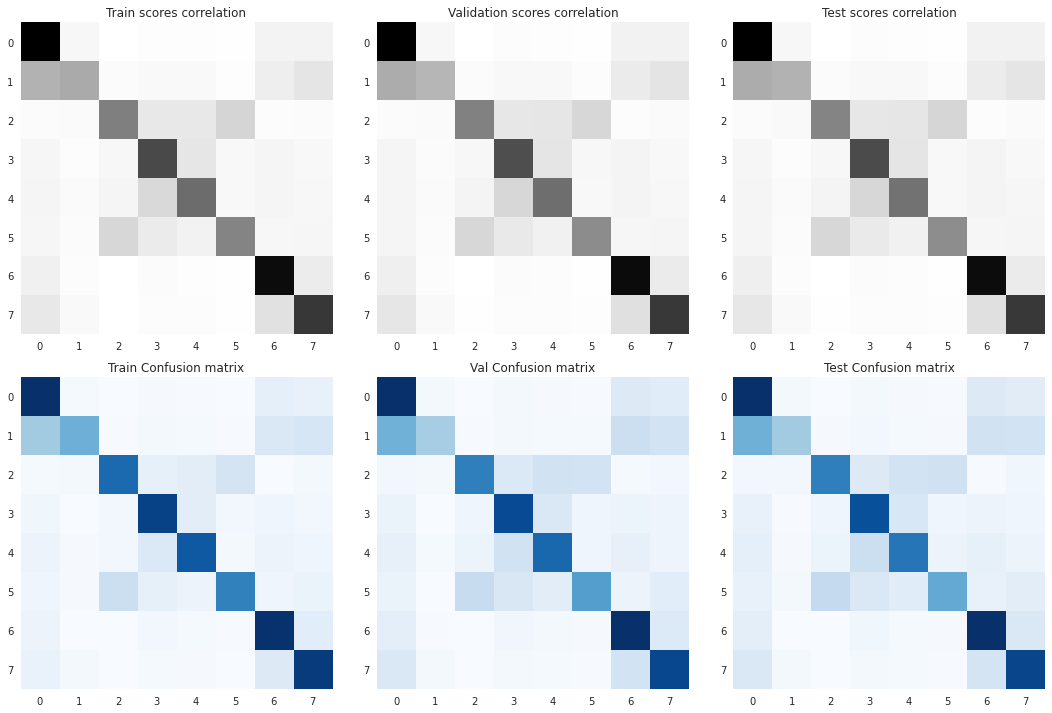

In [44]:
fig, ax = plt.subplots(2, 3, figsize=(5*3, 5*2))

m1 = np.matmul(train_pred_scores.T, train_pred_scores)
m1 = m1 / m1.sum(1, keepdims=True)
ax[0, 0].imshow(m1)
ax[0, 0].grid()
ax[0, 0].set_title("Train scores correlation")
cm1 = confusion_matrix(ti_tr_labels, train_pred_labels, normalize='true')
ax[1, 0].imshow(cm1, cmap='Blues')
ax[1, 0].set_title("Train Confusion matrix")
ax[1, 0].grid()

m2 = np.matmul(val_pred_scores.T, val_pred_scores)
m2 = m2 / m2.sum(1, keepdims=True)
ax[0, 1].imshow(m2)
ax[0, 1].grid()
ax[0, 1].set_title("Validation scores correlation")
cm2 = confusion_matrix(ti_va_labels, val_pred_labels, normalize='true')
ax[1, 1].imshow(cm2, cmap='Blues')
ax[1, 1].set_title("Val Confusion matrix")
ax[1, 1].grid()

m3 = np.matmul(test_pred_scores.T, test_pred_scores)
m3 = m3 / m3.sum(1, keepdims=True)
ax[0, 2].imshow(m3)
ax[0, 2].set_title("Test scores correlation")
ax[0, 2].grid()
cm3 = confusion_matrix(ti_te_labels, test_pred_labels, normalize='true')
ax[1, 2].imshow(cm3, cmap='Blues')
ax[1, 2].set_title("Test Confusion matrix")
ax[1, 2].grid()

plt.tight_layout()